In [1]:
import numpy as np
import torchaudio
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
import os

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
padding = torchaudio.transforms.PadTrim(94760)
mel_encoder = torchaudio.transforms.MEL

train_datapath = "./audio/"
test_datapath = "./test/"

train_csv = pd.read_csv("train.csv")
val_csv = pd.read_csv("val.csv")
test_csv = pd.read_csv("test.csv")

train_mels = []
val_mels = []
test_mels = []

In [3]:
for file_name in tqdm(train_csv["name"]):
    file_path = os.path.join(train_datapath, file_name)
    audio, rate = torchaudio.load(file_path)
    audio = padding(audio)
    
    
    mel = mel_encoder(sr=rate)(audio)
    train_mels.append(mel.squeeze().unsqueeze(dim=0))

100%|██████████| 7575/7575 [02:09<00:00, 58.39it/s]


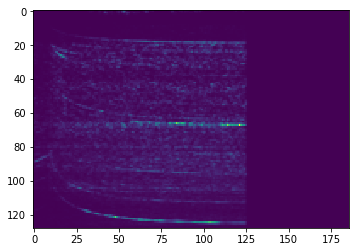

In [4]:
plt.imshow(train_mels[99][0].data.numpy())

In [5]:
for file_name in tqdm(val_csv["name"]):
    file_path = os.path.join(train_datapath, file_name)
    audio, rate = torchaudio.load(file_path)
    audio = padding(audio)
    
    
    mel = mel_encoder(sr=rate)(audio)
    val_mels.append(mel.squeeze().unsqueeze(dim=0))

100%|██████████| 3732/3732 [01:15<00:00, 49.69it/s]


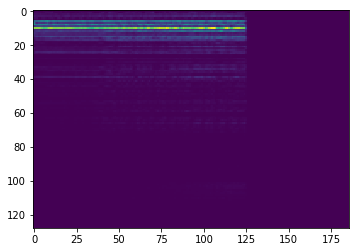

In [6]:
plt.imshow(val_mels[99][0].data.numpy())

In [7]:
for file_name in tqdm(test_csv["name"]):
    file_path = os.path.join(test_datapath, file_name)
    audio, rate = torchaudio.load(file_path)
    audio = padding(audio)
    
    
    mel = mel_encoder(sr=rate)(audio)
    test_mels.append(mel.squeeze().unsqueeze(dim=0))

100%|██████████| 610/610 [00:11<00:00, 50.88it/s]


In [8]:
train_mels = np.stack(train_mels)
val_mels = np.stack(val_mels)
test_mels = np.stack(test_mels)

In [9]:
np.save("train.npy", train_mels)
np.save("val.npy", val_mels)
np.save("test.npy", test_mels)